In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

Training data shape: (1460, 81)
Testing data shape: (1459, 80)


In [5]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
print("After dropping 'Id' column:")
print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

After dropping 'Id' column:
Training data shape: (1460, 80)
Testing data shape: (1459, 79)


In [6]:
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train_percent = 100 * missing_train / len(train)
missing_train_table = pd.concat([missing_train, missing_train_percent], axis=1, keys=['Total', 'Percent'])
print("\nMissing values in training data:")
print(missing_train_table)


Missing values in training data:
              Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
MasVnrType      872    59.73
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageYrBlt      81     5.55
GarageCond       81     5.55
GarageType       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtCond         37     2.53
BsmtQual         37     2.53
BsmtFinType1     37     2.53
MasVnrArea        8     0.55
Electrical        1     0.07


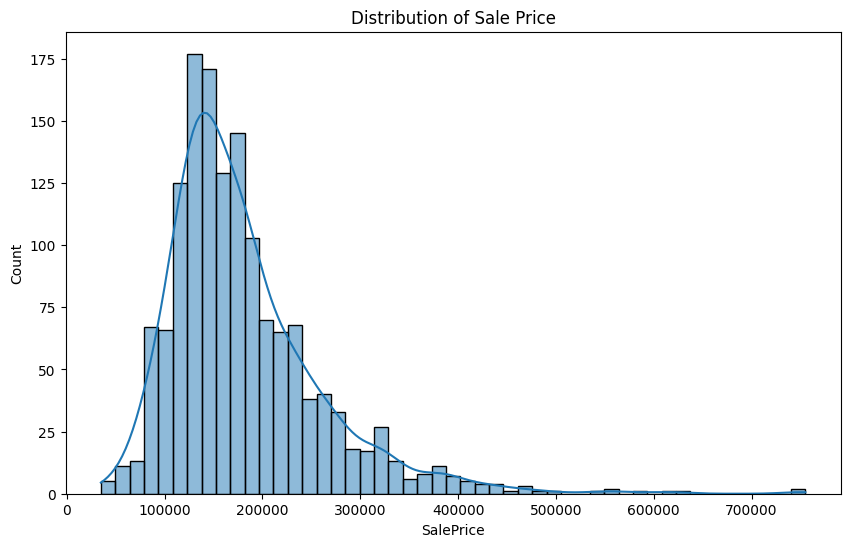

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

print(train_data['SalePrice'].describe())

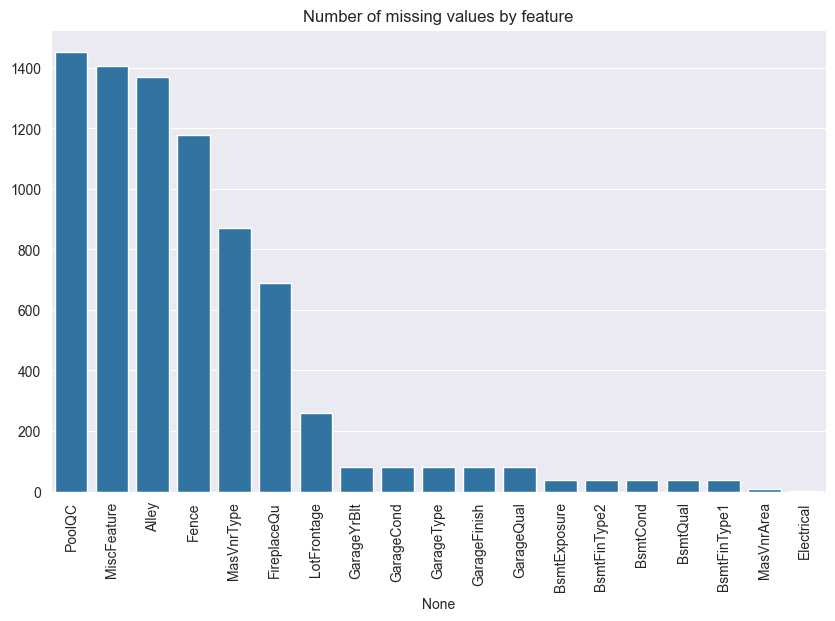

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_train.index, y=missing_train.values)
plt.xticks(rotation=90)
plt.title('Number of missing values by feature')
plt.show()

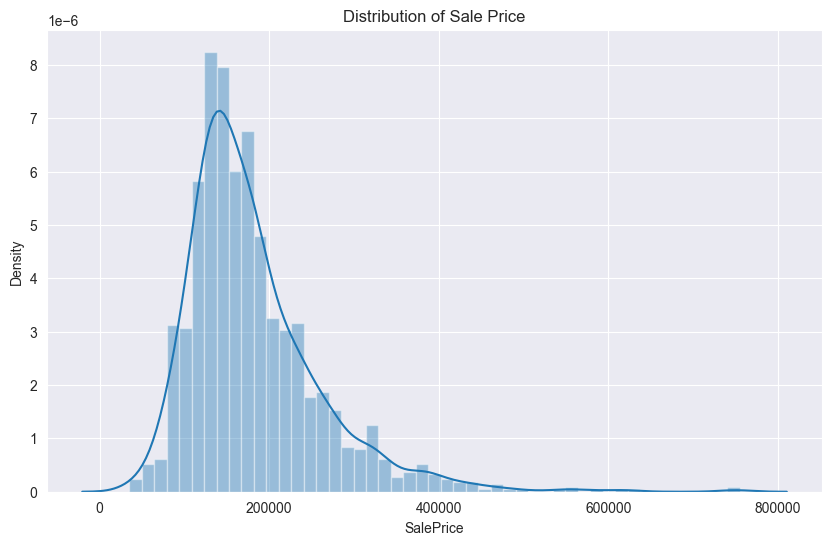

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.show()

In [9]:
print("\nSale Price Statistics:")
print(train['SalePrice'].describe())


Sale Price Statistics:
count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64


In [10]:
num_features = []
cate_features = []
for col in test.columns:
    if test[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('\nNumber of numeric features:', len(num_features))
print('Number of categorical features:', len(cate_features))


Number of numeric features: 36
Number of categorical features: 43


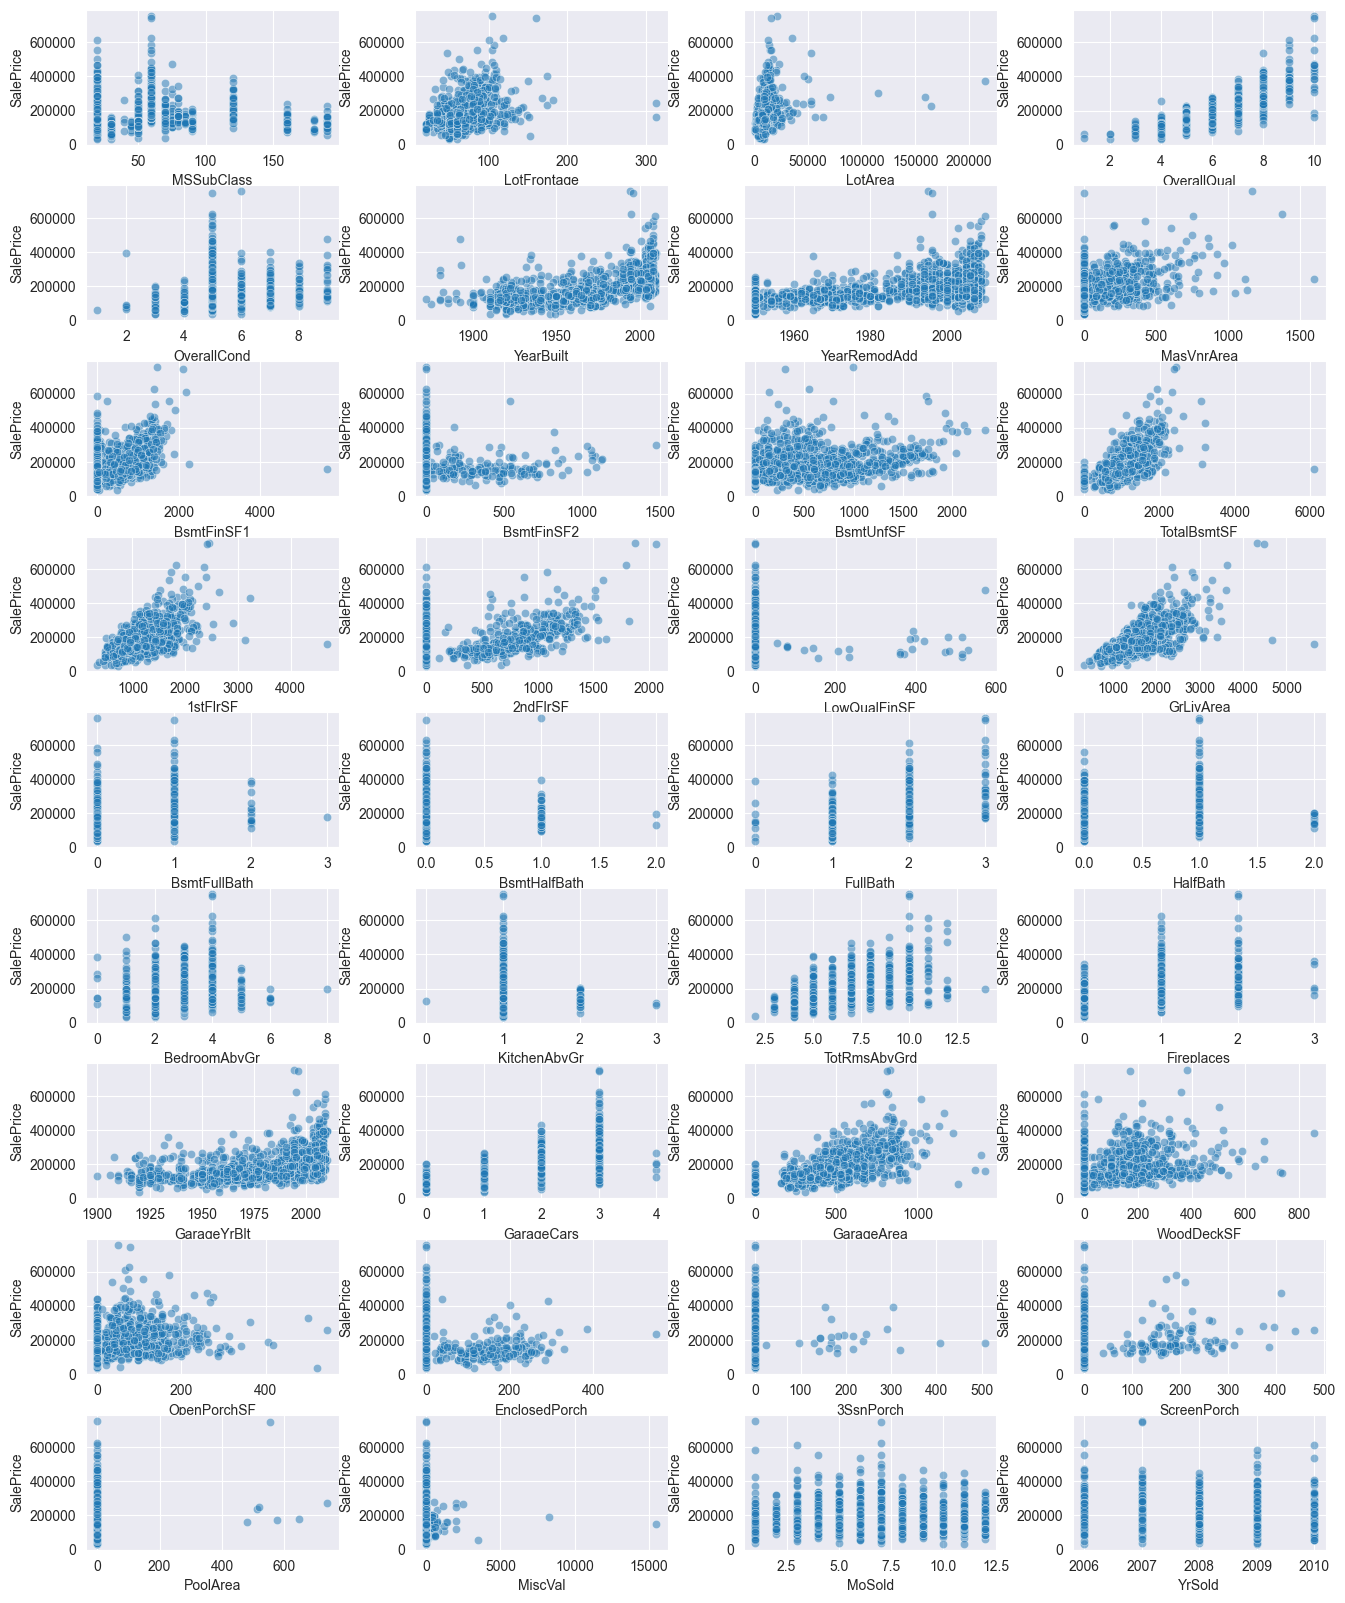

In [11]:
# 查看数字特征与目标值的关系
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(num_features):
    plt.subplot(9, 4, i+1)
    sns.scatterplot(x=feature, y='SalePrice', data=train, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.show()

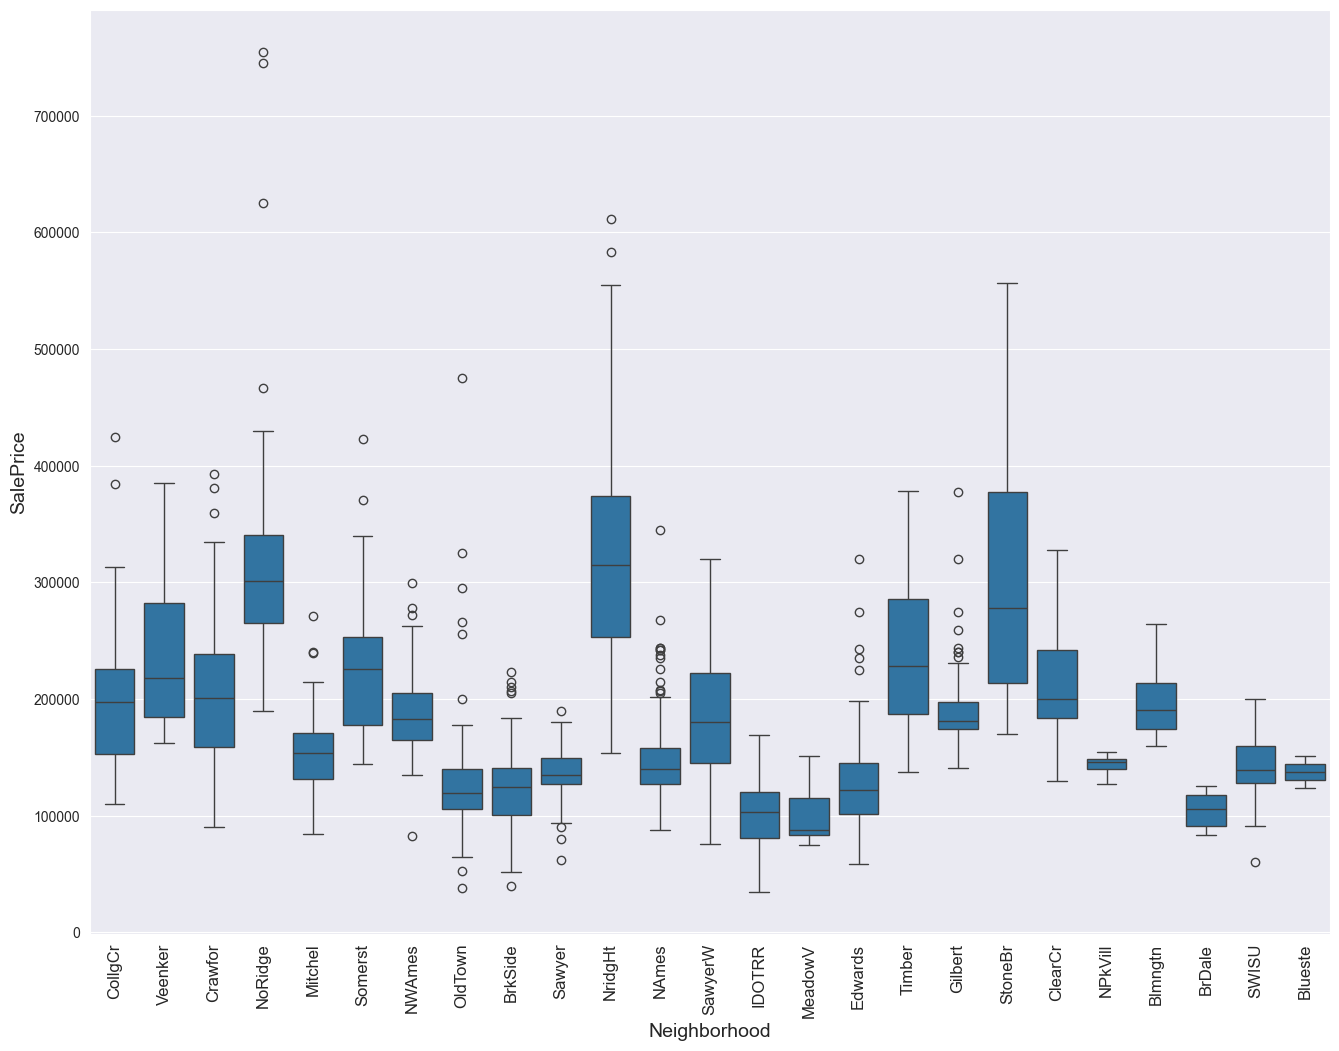

In [12]:
# 查看Neighborhood与房价的关系
plt.figure(figsize=(16, 12))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

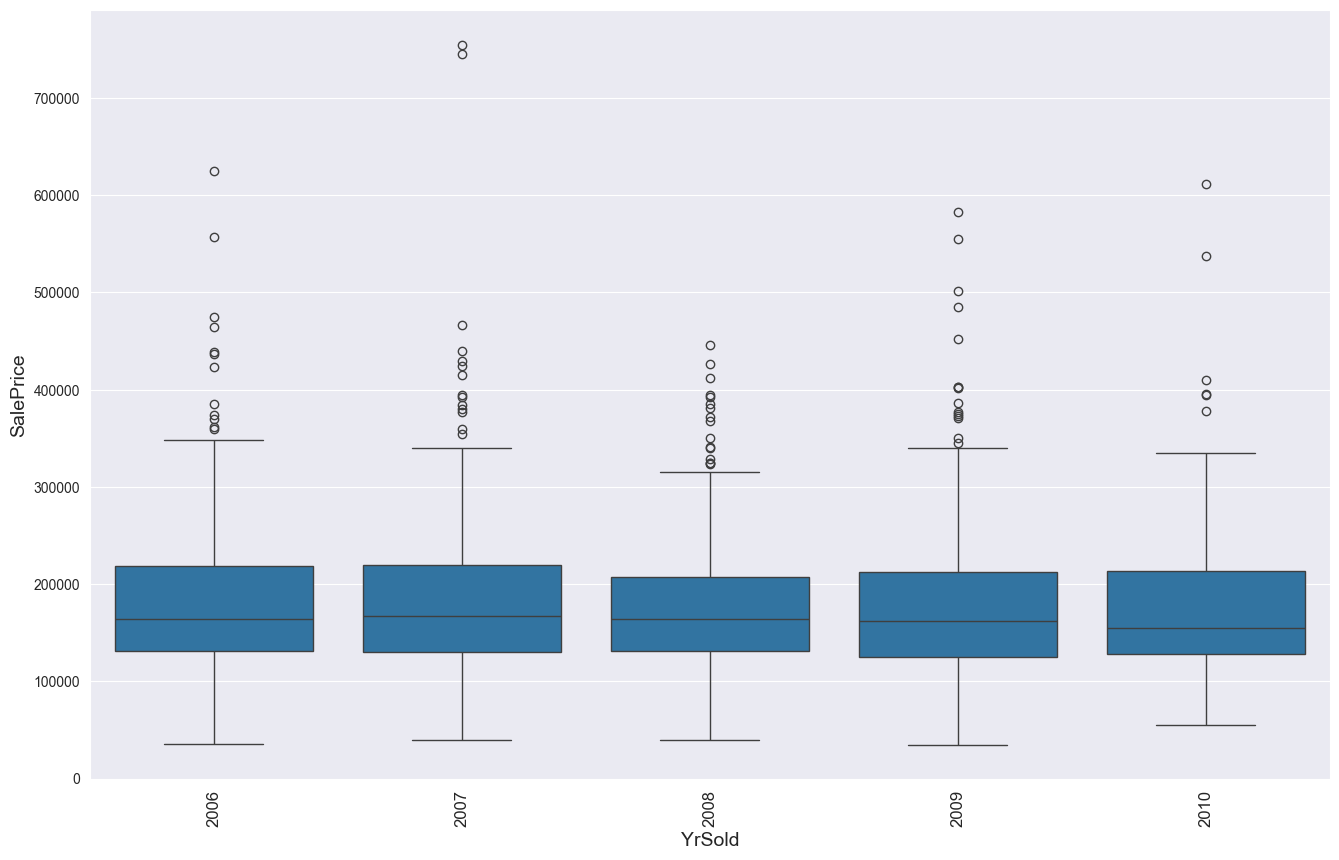

In [13]:
# 查看售出年份与房价的关系
plt.figure(figsize=(16, 10))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('YrSold', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

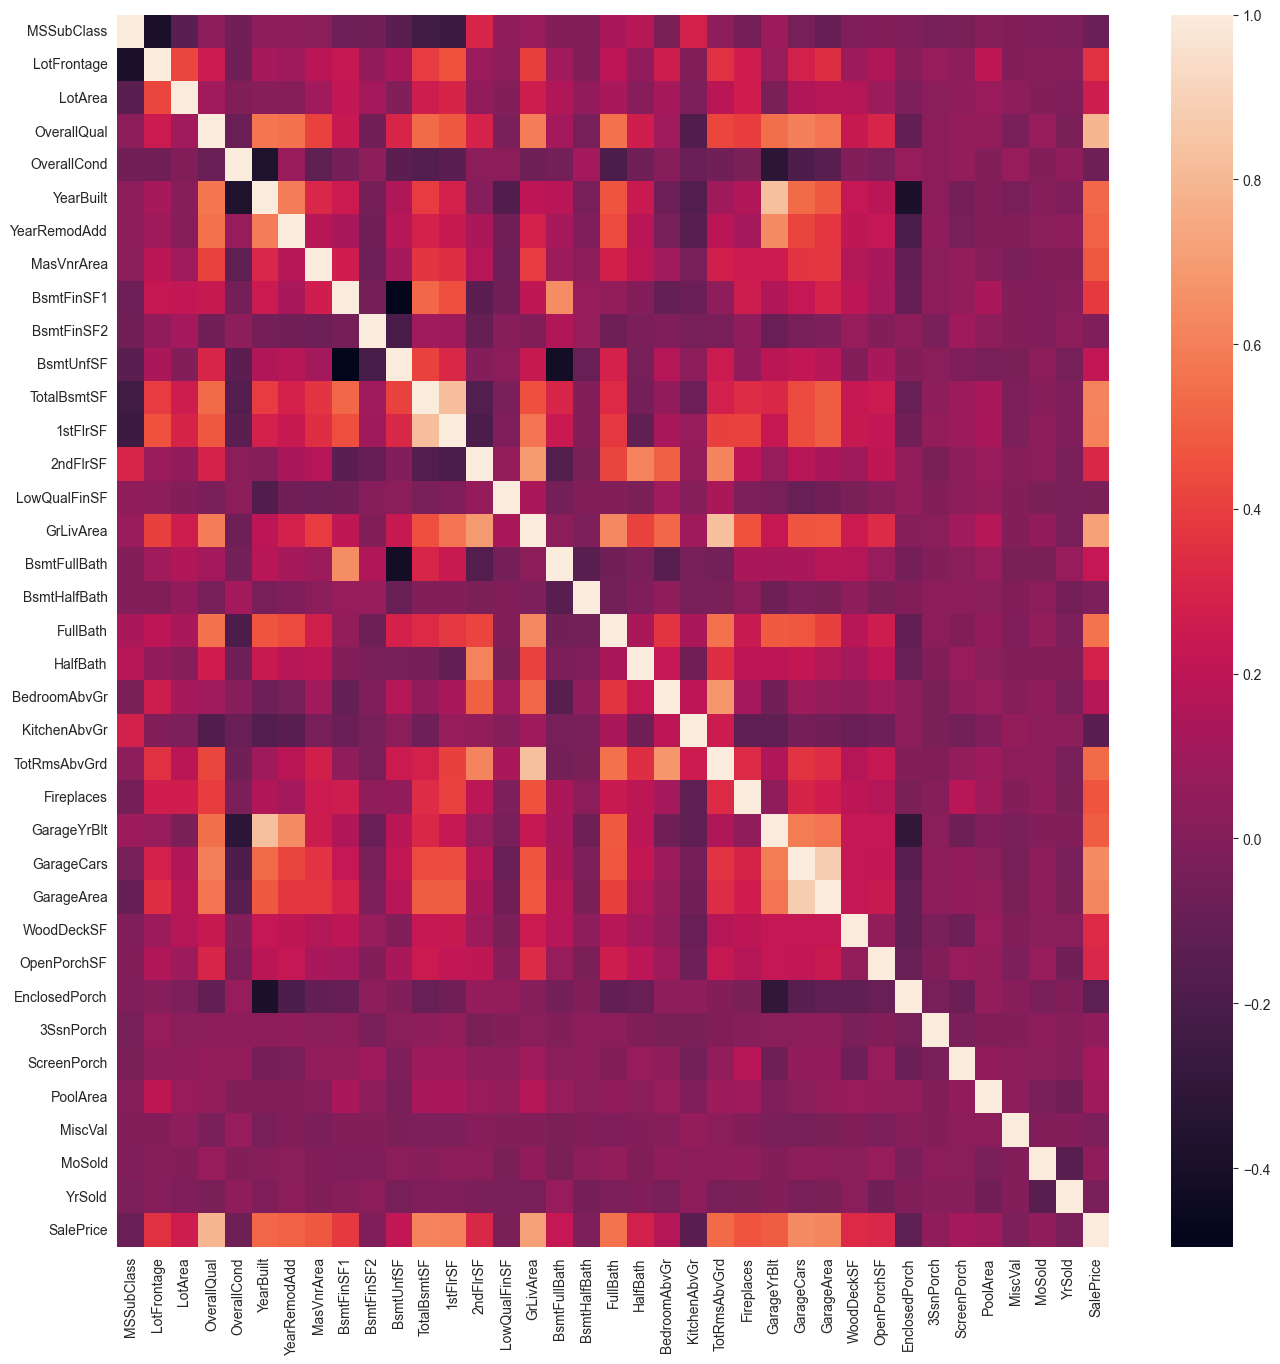

In [16]:
# 相关性分析 - 只使用数值型特征
numeric_features = train.select_dtypes(include=[np.number]).columns
corrs = train[numeric_features].corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs)
plt.show()


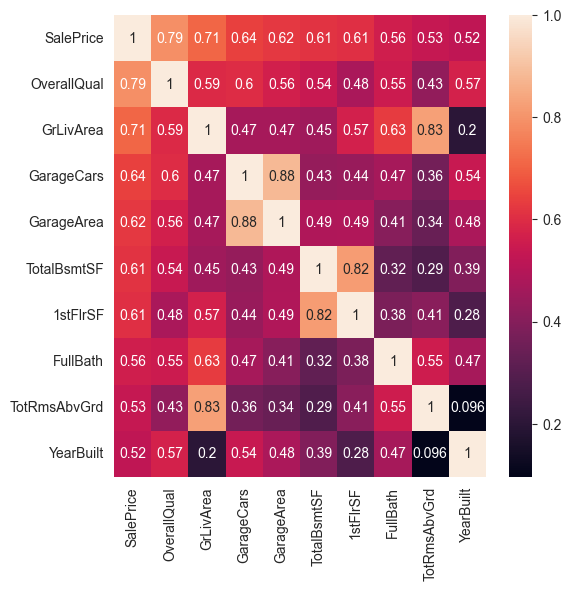

In [17]:

# 查看与目标值相关度最高的十个特征
cols_10 = corrs.nlargest(10, 'SalePrice')['SalePrice'].index
corrs_10 = train[cols_10].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corrs_10, annot=True)
plt.show()


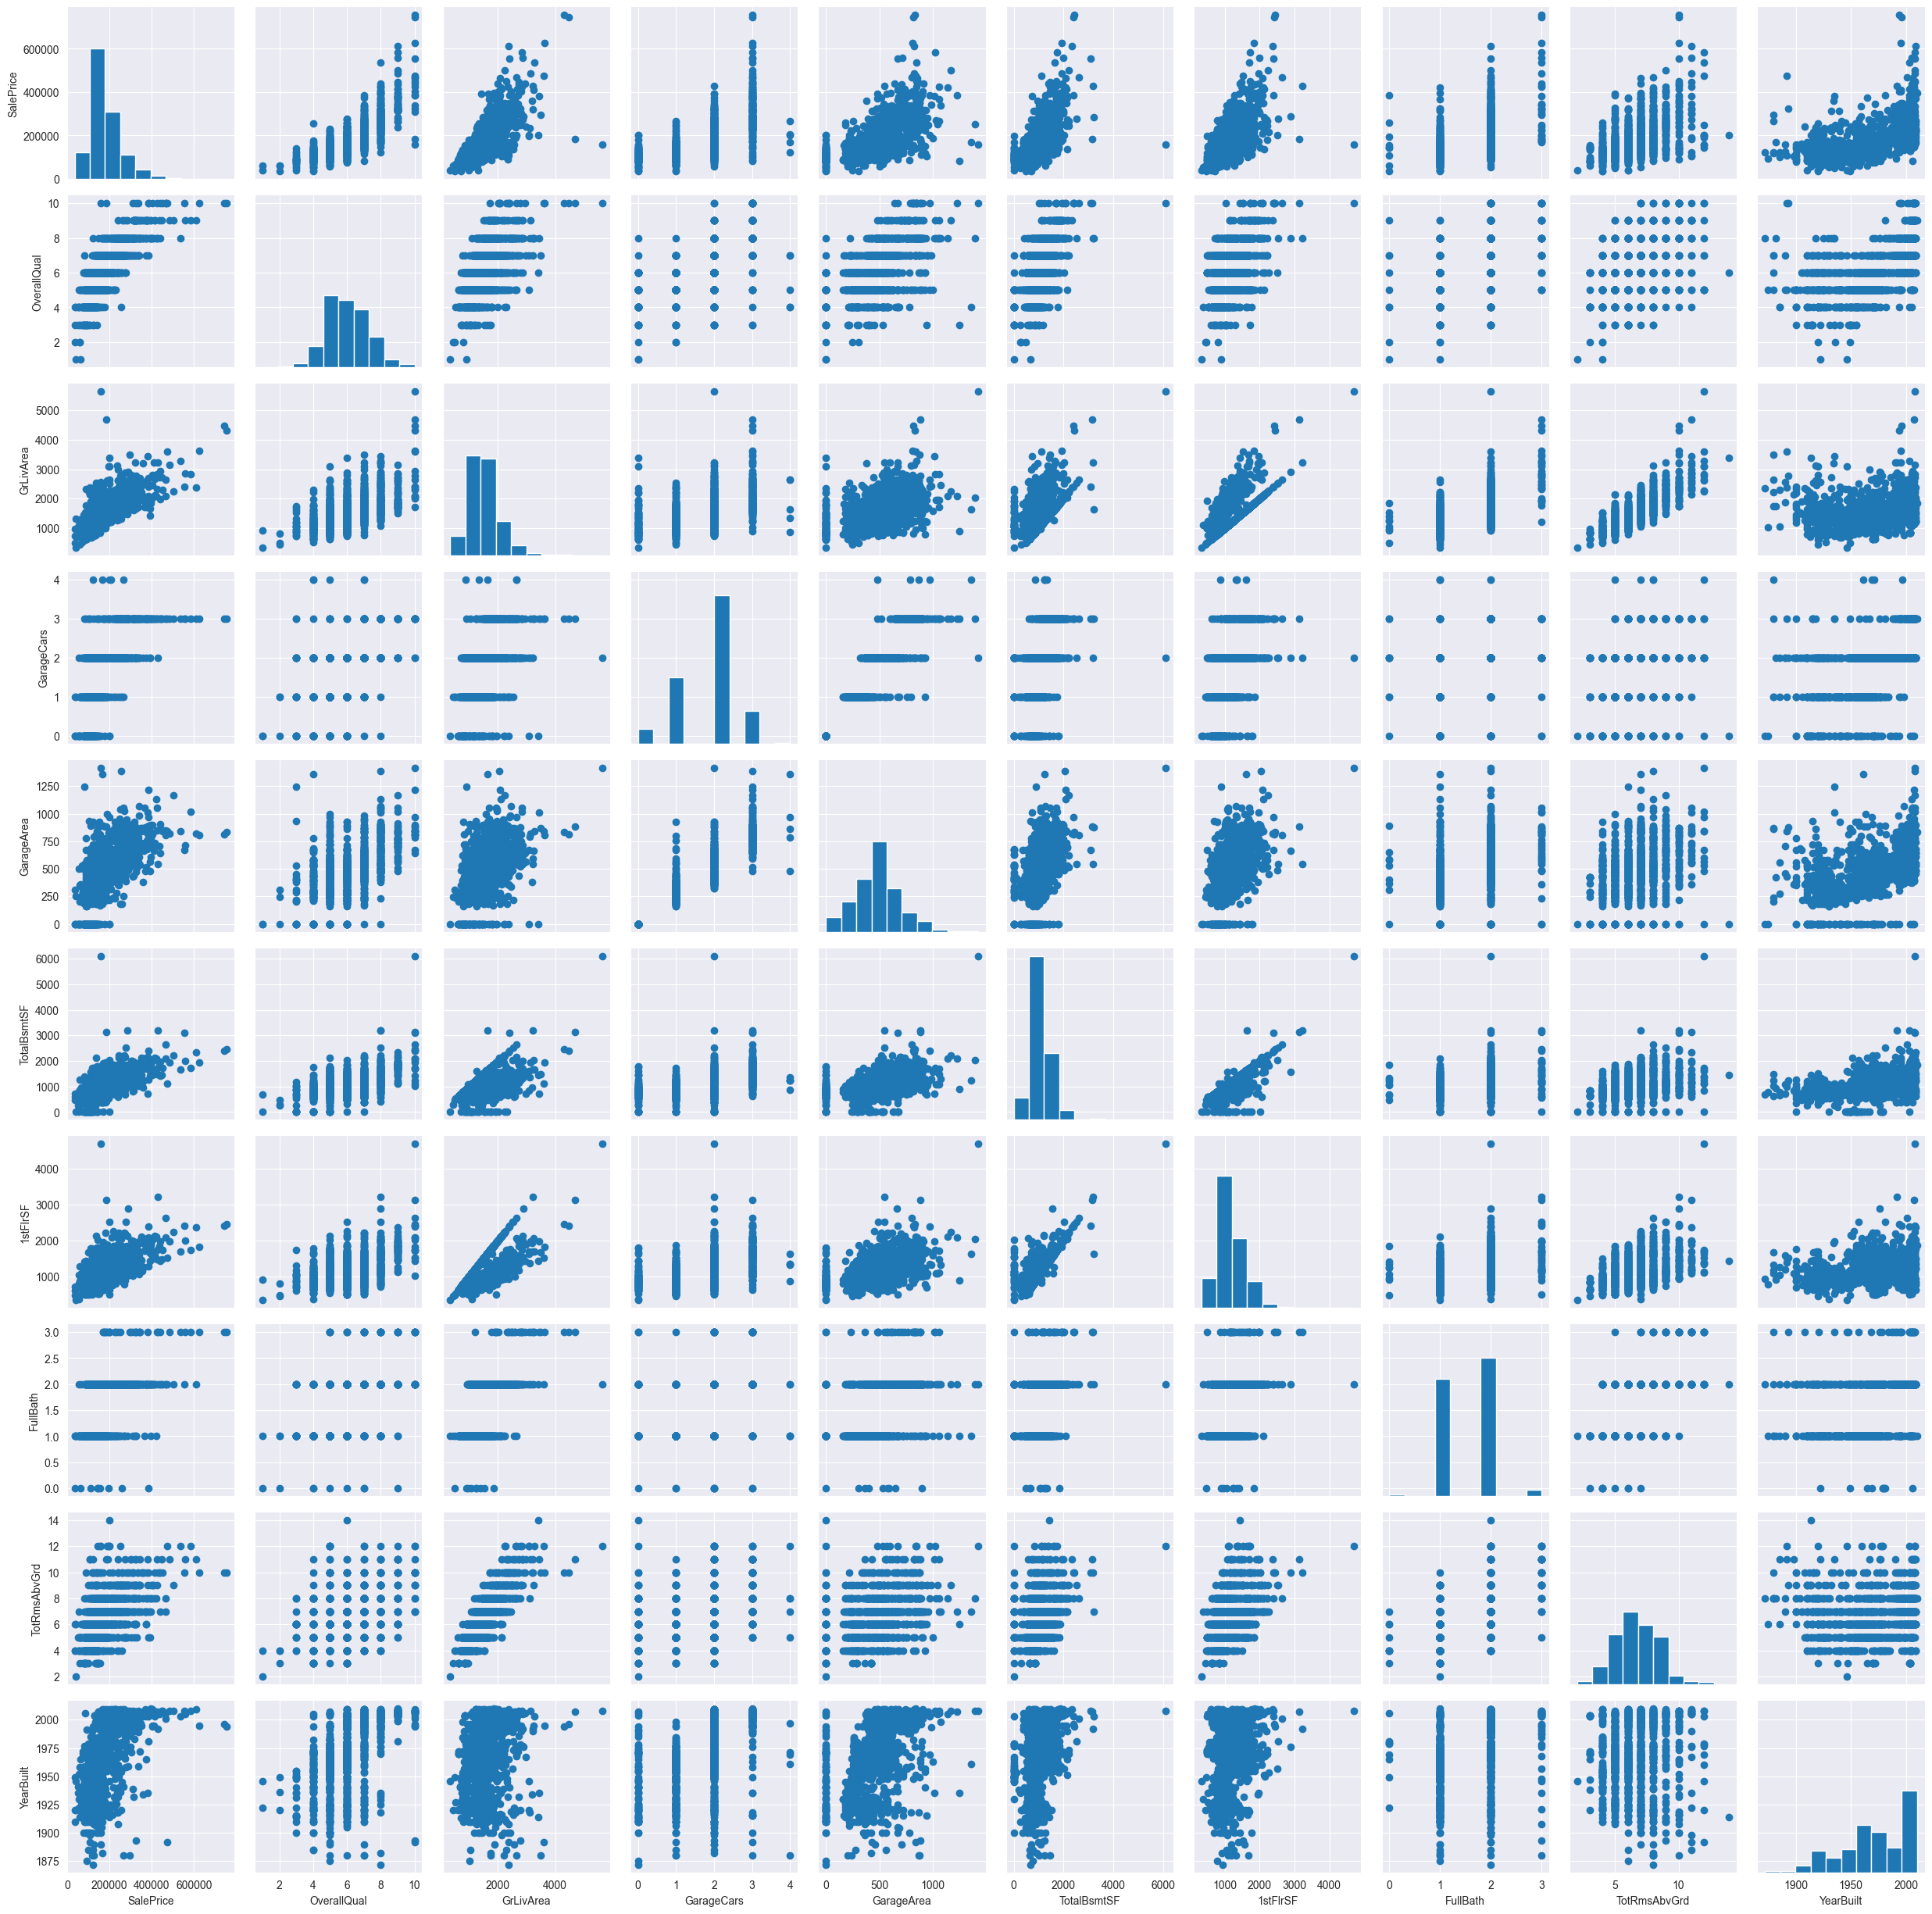

In [18]:
# 绘制这十个特征两两之间的关系
g = sns.PairGrid(train[cols_10])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()